<a href="https://colab.research.google.com/github/Hridita-Rubyat/BankChurn-predictive-models/blob/main/Text_Mining_with_book_ratings_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Text Mining with book_ratings dataset**

**Import libraries**

In [ ]:
#import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Loading data**

In [ ]:
#loading data
#reading book_ratings.csv
df = pd.read_csv("/content/sample_data/book_ratings.csv")
df

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1593351348,Wuthering Heights,18.96,AKZ3R4NWFK6ON,"E. Gray ""musiq lovr""",0.142857,5,1260230400,Got this,Got this book version along with Romeo & Julie...
1,1578849209,Natural Atheism,14.04,A384SQPY12385,David B. Pearson,0.950000,5,1135123200,Outstanding Freethought,"Although I've pretty much always been a ""natur..."
2,0613659155,Nights In Rodanthe (Turtleback School & Librar...,19.57,A2GAP7XWBZU8QI,Eric,NaN,4,1065744000,A Decent Novel,The first book I read by Mr. Sparks was 'A Wal...
3,1590594991,Pro Apache Log4j,43.94,A2IAL7V5B0M2LZ,"Wayne Cannon ""Wayne""",1.000000,4,1174176000,Almost identical with excellent on-line material,"This is an excellent reference. However, be aw..."
4,0201328186,"Yellow Fever, Black Goddess: The Coevolution O...",15.27,A14UM7LOF20W6P,Frank,0.666667,3,907200000,Stilted prose,"While the subject of the book is fascinating, ..."
...,...,...,...,...,...,...,...,...,...,...
995,1593359799,Long Spoon Lane (Charlotte and Thomas Pitt),17.89,A2GBJQ9THOYDAJ,Michael K. Smith,1.000000,3,1209859200,"""Most [policemen] are honorable, but corruptio...",I've been annoyed for some time -- for the pas...
996,1886388172,22 Friar Street,14.95,A14OJS0VWMOSWO,Midwest Book Review,1.000000,5,1034121600,Revealing the positive side of the human condi...,22 Friar Street is an exquisitely written nove...
997,1587155443,Wendigo,12.95,A1TBPAV6UHSZIV,Linda Clark,NaN,2,1356393600,Did not hold my interest,This is actually one of the few books that I h...
998,1564584623,Big Book of Things That Go,10.79,A3FXWOCMRX0QBC,"basketlover ""rtb""",NaN,5,1168300800,rtbrus,This along with the train book were my son's t...


**View 'review/text' column**

In [ ]:
#1. review review/text column
df["review/text"]

0      Got this book version along with Romeo & Julie...
1      Although I've pretty much always been a "natur...
2      The first book I read by Mr. Sparks was 'A Wal...
3      This is an excellent reference. However, be aw...
4      While the subject of the book is fascinating, ...
                             ...                        
995    I've been annoyed for some time -- for the pas...
996    22 Friar Street is an exquisitely written nove...
997    This is actually one of the few books that I h...
998    This along with the train book were my son's t...
999    I wish I had this when I was in my first 2 yea...
Name: review/text, Length: 1000, dtype: object

**View 'review/summary' column**

In [ ]:
#1.  review review/summary column
df["review/summary"]

0                                               Got this
1                                Outstanding Freethought
2                                         A Decent Novel
3       Almost identical with excellent on-line material
4                                          Stilted prose
                             ...                        
995    "Most [policemen] are honorable, but corruptio...
996    Revealing the positive side of the human condi...
997                             Did not hold my interest
998                                               rtbrus
999                   Must have for all nursing students
Name: review/summary, Length: 1000, dtype: object

In [ ]:
#1.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   object 
 1   Title               1000 non-null   object 
 2   Price               1000 non-null   float64
 3   User_id             1000 non-null   object 
 4   profileName         1000 non-null   object 
 5   review/helpfulness  715 non-null    float64
 6   review/score        1000 non-null   int64  
 7   review/time         1000 non-null   int64  
 8   review/summary      1000 non-null   object 
 9   review/text         1000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 78.2+ KB


### **Preprocessing( tokenization, lowercasing, stop word removal)of text columns("review/text" and"review/summary") from 'book_ratings' dataset.**

## **1. Preprocessiong of 'review/text' column**

**Text preprocessing steps:**

* **Punctuation Removal:** I began by removing punctuation marks from the "review/text” and
"review/sumamry" column to clean the text and prepare it for further processing.
* **Lowercasing:** I converted all words to lowercase to ensure consistency and remove case
sensitivity. This step helps in treating words like "Book" and "book" as the same.
*  **Tokenization:** I then tokenized the text using the NLTK library's word_tokenize function.
Tokenization breaks the text into individual words or tokens, making it easier to analyze and
process.
*  **Removal of Stop Words:** I removed common stop words such as "the",”this”, "is", "with", etc.,
which do not contribute much to the meaning of the text. This helps in reducing noise in the
data and focuses on more meaningful words.
* **Stemming:** I applied stemming to reduce words to their root or base form. This helps in
consolidating words with similar meanings, such as "reading", "read", and "reader" all being
stemmed to "read". This step aids in improving text analysis by treating variations of words
uniformly.


**Removing punctuation**

In [ ]:
#1. Removing punctuation from the review/text column
df["review/text"] = df["review/text"].str.replace('[^\w\s]', '', regex=True)

#viewing column after removing punctuation
df["review/text"]

0      Got this book version along with Romeo  Juliet...
1      Although Ive pretty much always been a natural...
2      The first book I read by Mr Sparks was A Walk ...
3      This is an excellent reference However be awar...
4      While the subject of the book is fascinating a...
                             ...                        
995    Ive been annoyed for some time  for the past d...
996    22 Friar Street is an exquisitely written nove...
997    This is actually one of the few books that I h...
998    This along with the train book were my sons tw...
999    I wish I had this when I was in my first 2 yea...
Name: review/text, Length: 1000, dtype: object

**Converting all words to lowercase**

In [ ]:
#1. converting all words to lowercase
df["review/text"] = df["review/text"].str.lower()
#viewing column
df["review/text"]

0      got this book version along with romeo  juliet...
1      although ive pretty much always been a natural...
2      the first book i read by mr sparks was a walk ...
3      this is an excellent reference however be awar...
4      while the subject of the book is fascinating a...
                             ...                        
995    ive been annoyed for some time  for the past d...
996    22 friar street is an exquisitely written nove...
997    this is actually one of the few books that i h...
998    this along with the train book were my sons tw...
999    i wish i had this when i was in my first 2 yea...
Name: review/text, Length: 1000, dtype: object

**Tokenizing**

In [ ]:
#1.Tokenizing

import nltk
nltk.download('punkt')


from nltk.tokenize import word_tokenize

# Tokenizing all rows of these columns of the data
df["review/text"] = df["review/text"].apply(word_tokenize)

#viewing column
df["review/text"]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0      [got, this, book, version, along, with, romeo,...
1      [although, ive, pretty, much, always, been, a,...
2      [the, first, book, i, read, by, mr, sparks, wa...
3      [this, is, an, excellent, reference, however, ...
4      [while, the, subject, of, the, book, is, fasci...
                             ...                        
995    [ive, been, annoyed, for, some, time, for, the...
996    [22, friar, street, is, an, exquisitely, writt...
997    [this, is, actually, one, of, the, few, books,...
998    [this, along, with, the, train, book, were, my...
999    [i, wish, i, had, this, when, i, was, in, my, ...
Name: review/text, Length: 1000, dtype: object

**Removal of stop_words**

In [ ]:
#1. removal of stop_words
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

stop = stopwords.words("english")
df["review/text"] = df["review/text"].apply(lambda x: " ".join(x for x in x.split()
                                                         if x not in stop))

#view output
df["review/text"]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0      got book version along romeo juliet pride pred...
1      although ive pretty much always natural atheis...
2      first book read mr sparks walk remember book d...
3      excellent reference however aware provide much...
4      subject book fascinating interesting informati...
                             ...                        
995    ive annoyed time past dozen volumes generally ...
996    22 friar street exquisitely written novel nan ...
997    actually one books ever stopped reading story ...
998    along train book sons two favorite gifts knows...
999    wish first 2 years nursing schoolall papers ap...
Name: review/text, Length: 1000, dtype: object

**Stemming**

In [ ]:
#1. stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
df["review/text"] = df["review/text"].apply(lambda x: " ".join([st.stem(word)
                                                         for word in x.split()]))

df["review/text"]

0      got book version along romeo juliet pride pred...
1      although ive pretti much alway natur atheist r...
2      first book read mr spark walk rememb book draw...
3      excel refer howev awar provid much isnt readil...
4      subject book fascin interest inform book book ...
                             ...                        
995    ive annoy time past dozen volum gener firstrat...
996    22 friar street exquisit written novel nan dev...
997    actual one book ever stop read stori line disj...
998    along train book son two favorit gift know eve...
999    wish first 2 year nurs schoolal paper apa form...
Name: review/text, Length: 1000, dtype: object

# **2. Creating Word Clouds of 'review/text' column**

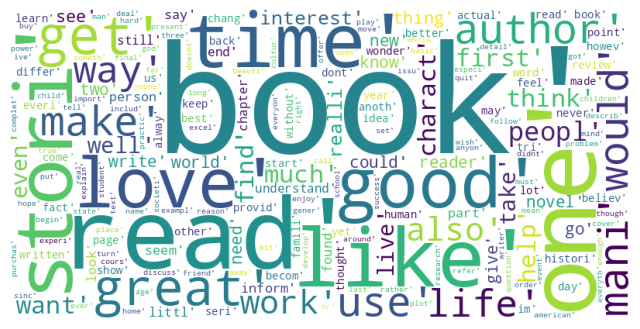

In [ ]:
#2. wordcloud for remember "review/text" column

#to install WordCloud first
!pip install WordCloud

from wordcloud import WordCloud

comment_words1 = str(' '.join(df["review/text"]).split())

# word cloud
wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate(comment_words1)

# if you get font error, can try the following
# wordcloud = WordCloud(font_path='/path/to/your/font.ttf', width=800, height=400,
# background_color='white').generate(sample_text)

plt.figure(figsize=(8,8))
plt.clf()
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

In the provided word cloud, the prominence of "book" as the largest and boldest word suggests that the
text primarily revolves around books. The following closely are words like "read," "story," "one," and
"time," indicating activities related to reading and storytelling. As the size gradually decreases, terms like
"get," "love," and "good" remain significant but to a lesser extent, possibly reflecting sentiments or actions
associated with reading. Finally, smaller words such as "life" and "author" imply less frequent occurrence
or relevance within the text, indicating a focus on literary content rather than broader life topics or
authorship.


# **1. Preprocessiong of 'review/summary' column**

In [ ]:
#Preprocessing of "review/summary" of text columns.

# Remove punctuation from the review/text column
df["review/summary"] = df["review/summary"].str.replace('[^\w\s]', '', regex=True)

# convert all words to lowercase
df["review/summary"] = df["review/summary"].str.lower()


# removal of stop_words
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stop = stopwords.words("english")
df["review/summary"] = df["review/summary"].apply(lambda x: " ".join(x for x in x.split()
                                                         if x not in stop))

# stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
df["review/summary"] = df["review/summary"].apply(lambda x: " ".join([st.stem(word)
                                                         for word in x.split()]))

# further remove custom stopwords, which are problem specific
stop += ["would", "may", "must", "one", "upon", "might", "shall", "could"]
df["review/summary"] = df["review/summary"].apply(lambda x: " ".join(x for x in x.split()
                                                         if x not in stop))

df["review/summary"]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                                        got
1                       outstand freethought
2                               decent novel
3            almost ident excel onlin materi
4                                stilt prose
                       ...                  
995    policemen honor corrupt beget corrupt
996           reveal posit side human condit
997                            hold interest
998                                    rtbru
999                             nurs student
Name: review/summary, Length: 1000, dtype: object

## **2. Creating Word Clouds for 'review/summary' column**

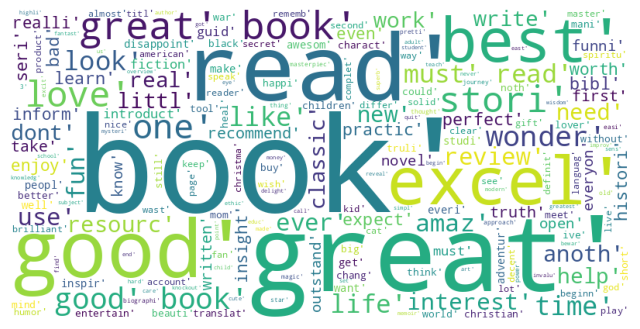

In [ ]:
#2. wordcloud for remember "review/summary" column

#remember to install WordCloud first
!pip install WordCloud

from wordcloud import WordCloud

comment_words2 = str(' '.join(df["review/summary"]).split())

# word cloud
wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate(comment_words2)

# if you get font error, can try the following
# wordcloud = WordCloud(font_path='/path/to/your/font.ttf', width=800, height=400,
# background_color='white').generate(sample_text)

plt.figure(figsize=(8,8))
plt.clf()
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

In this word cloud, "book" emerges as the most prominent word, followed by terms like "great," "read,"
and "excel," indicating a positive sentiment towards books. Gradually diminishing in size are words like
"good," "best," and "story," highlighting aspects of quality, enjoyment, and narrative. Further down, terms
such as "love," "classic," "review," and "disappoint" suggest discussions on book preferences and
experiences. Overall, the visualization suggests a focus on books and their attributes, with varying degrees
of praise and critique

# **3. Text Mining on columns to estimate the similarity between the documents**

### **Estimating the similarity between documents "review/text" columns.**

In [ ]:
#3. Estimating the similarity between documents "review/text" columns.

# Tokenize the documents in the 'review/text' column
corpus1 = [doc.split() for doc in df["review/text"]]
corpus1[0:10]



[['got',
  'book',
  'version',
  'along',
  'romeo',
  'juliet',
  'pride',
  'predjudic',
  'secret',
  'santa',
  'gift',
  'cover',
  'pretti',
  'la',
  'twilight'],
 ['although',
  'ive',
  'pretti',
  'much',
  'alway',
  'natur',
  'atheist',
  'recent',
  'month',
  'open',
  'take',
  'dr',
  'eller',
  'book',
  'slightli',
  'differ',
  'other',
  'might',
  'get',
  'sound',
  'reason',
  'earli',
  'chapter',
  'book',
  'somewhat',
  'moot',
  'freethink',
  'alreadi',
  'drawn',
  'much',
  'conclusionsfor',
  'perhap',
  'overlook',
  'strength',
  'dr',
  'eller',
  'book',
  'come',
  'later',
  'chapter',
  'deal',
  'theist',
  'ongo',
  'struggl',
  'trace',
  'past',
  'present',
  'constant',
  'threat',
  'fundamentalistbas',
  'oppress',
  'today',
  'societi',
  'book',
  'map',
  'good',
  'reason',
  'one',
  'atheist',
  'also',
  'one',
  'right',
  'reason',
  'threaten',
  'notnatur',
  'atheism',
  'one',
  'best',
  'sever',
  'book',
  'ive',
  'read

In [ ]:
#3.
import gensim
from gensim import corpora, models

# Create the term dictionary of the corpus in the 'review/text' column
dictionary1 = corpora.Dictionary(corpus1)

dictionary1.filter_extremes(no_below = 10, no_above = 0.75)

# Convert the corpus into Document Term Matrix
DFM1 = [dictionary1.doc2bow(doc) for doc in corpus1]



In [ ]:
#3.
# Computing similarity between documents in the 'review/text' column
# Distance is 1-similarity
from gensim.similarities import MatrixSimilarity
simil = MatrixSimilarity(DFM1, num_features=len(dictionary1))
distance = 1 - simil[DFM1]

# convert simil to a data frame
review_text_sim = pd.DataFrame(simil[DFM1])
review_text_sim[2]

0      0.000000
1      0.115517
2      1.000000
3      0.000000
4      0.046676
         ...   
995    0.098020
996    0.082385
997    0.192232
998    0.077674
999    0.035007
Name: 2, Length: 1000, dtype: float32

### **The similarity output tables for the first 5 documents for ‘review/text’ columns**

In [ ]:
#3.
review_text_sim[0:5]

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,0.044544,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078386,...,0.089087,0.000000,0.000000,0.000000,0.000000,0.075593,0.000000,0.000000,0.419314,0.000000
1,0.044544,1.000000,0.115517,0.044544,0.104757,0.113092,0.204124,0.000000,0.129580,0.195529,...,0.000000,0.028583,0.163430,0.060634,0.113317,0.164992,0.046225,0.115563,0.000000,0.029463
2,0.000000,0.115517,1.000000,0.000000,0.046676,0.134373,0.222324,0.000000,0.153964,0.116162,...,0.165025,0.000000,0.271857,0.024015,0.173109,0.098020,0.082385,0.192232,0.077674,0.035007
3,0.000000,0.044544,0.000000,1.000000,0.062994,0.068006,0.000000,0.000000,0.023088,0.039193,...,0.000000,0.045835,0.052414,0.032410,0.000000,0.018898,0.037062,0.037062,0.000000,0.094491
4,0.000000,0.104757,0.046676,0.062994,1.000000,0.146608,0.096225,0.078567,0.067872,0.138260,...,0.000000,0.000000,0.030817,0.057166,0.091574,0.200000,0.087163,0.021791,0.000000,0.000000


### **Estimating the similarity between documents "review/summary" columns.**

In [ ]:
#3.
#Tokenize the documents in the'review/summary' column
corpus2 = [doc.split() for doc in df["review/summary"]]
corpus2[0:10]

[['Got', 'this'],
 ['Outstanding', 'Freethought'],
 ['A', 'Decent', 'Novel'],
 ['Almost', 'identical', 'with', 'excellent', 'on-line', 'material'],
 ['Stilted', 'prose'],
 ['Made', 'Me', 'a', 'Wrestling', 'Fan'],
 ['Rivetting', 'and', 'intense!'],
 ['Great', 'Response'],
 ['Great', 'Book!'],
 ['A', 'Great', 'Little', 'Intro']]

In [ ]:
#3.
import gensim
from gensim import corpora, models

# Create the term dictionary of the corpus in the'review/summary' column
dictionary2 = corpora.Dictionary(corpus2)

dictionary2.filter_extremes(no_below = 2, no_above = 0.75)

# Convert the corpus into Document Term Matrix
DFM2 = [dictionary2.doc2bow(doc) for doc in corpus2]

print(DFM2)

[[(0, 1), (1, 1)], [(2, 1)], [(3, 1), (4, 1), (5, 1)], [(6, 1), (7, 1), (8, 1)], [], [(9, 1), (10, 1)], [(11, 1)], [(12, 1)], [(12, 1), (13, 1)], [(3, 1), (12, 1), (14, 1)], [], [(3, 1), (15, 1), (16, 1), (17, 1)], [(11, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)], [(11, 2), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1)], [(25, 1), (30, 1), (31, 1)], [(3, 1), (32, 1), (33, 1)], [(3, 1), (8, 1), (10, 1), (34, 1), (35, 1), (36, 1)], [(37, 1), (38, 1)], [(39, 1)], [(3, 1), (14, 1), (40, 1), (41, 1)], [(10, 1), (32, 1), (42, 1), (43, 1), (44, 1)], [(45, 1)], [(46, 1), (47, 1)], [(33, 1), (48, 1)], [(3, 1), (49, 1), (50, 1), (51, 1)], [(12, 1), (14, 1), (40, 1)], [(52, 1), (53, 1)], [], [(54, 1), (55, 1)], [(35, 1), (54, 1), (55, 1), (56, 1), (57, 1)], [(38, 1), (58, 1), (59, 1)], [(1, 1), (60, 1), (61, 1), (62, 1), (63, 1)], [(64, 1), (65, 1)], [(35, 1), (55, 1), (66, 1), (67, 1), (68, 1)], [(32, 1), (54, 1)], [(9, 1), (69, 1)], [(11, 1), (25, 1), (32, 1), (70, 1), (71

In [ ]:
#3.
# Compute similarity between documents in the'review/summary' column
# Distance is 1-similarity
from gensim.similarities import MatrixSimilarity
simil2 = MatrixSimilarity(DFM2, num_features=len(dictionary2))
distance = 1 - simil2[DFM2]

# convert simil to a data frame
review_summary_sim = pd.DataFrame(simil2[DFM2])
review_summary_sim[2]

0      0.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
995    0.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: 2, Length: 1000, dtype: float32

### **The similarity output tables for the first 5 documents for ‘review/summary’ columns**

In [ ]:
#3.
review_summary_sim[0:5]

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **4. topic modeling on “review/text” using LDA model**

In [ ]:
#4 Perform topic modeling on “review/text” using LDA model and generate 6 topics.

# Creating LDA model using gensim library
n_topics = 6
ldamodel1 = models.LdaModel(DFM1, num_topics=n_topics, id2word=dictionary1, passes=15)

# Extract the topics and print their terms
topics = ldamodel1.print_topics(num_topics=n_topics, num_words=20)
for topic_id, topic_terms in topics:
    topic_terms = ' '.join([term.split('*')[1] for term in topic_terms.split(' + ')])
    print(f"Topic {topic_id + 1}: {topic_terms}")

Topic 1: "peopl" "read" "help" "would" "want" "one" "think" "work" "author" "good" "mani" "live" "year" "studi" "inform" "also" "well" "play" "dont" "much"
Topic 2: "mani" "use" "one" "help" "author" "make" "failur" "work" "way" "new" "get" "time" "read" "discuss" "great" "take" "peopl" "even" "good" "part"
Topic 3: "use" "one" "would" "recommend" "work" "life" "look" "great" "inform" "art" "found" "well" "read" "much" "live" "also" "written" "page" "learn" "reader"
Topic 4: "read" "stori" "love" "like" "one" "charact" "get" "time" "good" "would" "realli" "make" "great" "way" "life" "first" "know" "well" "think" "novel"
Topic 5: "busi" "manag" "read" "one" "mani" "also" "make" "practic" "improv" "great" "compani" "help" "inform" "write" "good" "knowledg" "use" "refer" "provid" "work"
Topic 6: "read" "one" "time" "author" "like" "mani" "peopl" "world" "us" "god" "bibl" "reader" "histori" "point" "understand" "fact" "view" "much" "also" "would"


**Discussion about the topics :**

**Topic 1:**
This topic seems to focus on the act of reading, with terms like "read," "time," and "good" suggesting
discussions about reading habits and preferences. Words like "author" and "great" may indicate
appreciation for specific authors and their works, while terms such as "peopl" and "way" hint at broader
discussions about reading culture and practices.

**Topic 2:** Discussions in this topic appear to revolve around recommending books, as indicated by terms
like "buy," "help," and "recommend." The presence of words like "love," "great," and "friend" suggests
positive sentiments towards recommended books and the sharing of reading experiences with others.
Additionally, terms like "children" and "everyon" hint at discussions about books suitable for different
audiences.

# **5.a) SVD to extract 5 components from the “review/text” column**

In [ ]:
#5.Build predictive models for review/score: Apply SVD to extract 5 components from the “review/text” column.
# Creating a TF-IDF model from DFM1

tfidf1 = models.TfidfModel(DFM1)
DFM1_tfidf = tfidf1[DFM1]

n_SVD = 5
SVD_model1 = models.LsiModel(DFM1_tfidf, id2word=dictionary1, num_topics=n_SVD)
SVD1 = SVD_model1[DFM1_tfidf]

# convert results into array
svd_array = gensim.matutils.corpus2csc(SVD1).T.toarray()

# convert results to data frame
svd_df = pd.DataFrame(svd_array)

# show SVD results - reduced vector representation of the documents
svd_df


,0,1,2,3,4
0,0.078646,0.013105,-0.083270,0.031027,0.014828
1,0.212050,0.073549,0.033876,0.041787,-0.007877
2,0.230351,-0.188416,-0.068648,-0.062327,-0.012859
3,0.104645,0.116999,-0.019352,0.000128,-0.082380
4,0.218811,0.062781,0.115765,-0.007712,-0.055504
...,...,...,...,...,...
995,0.252396,-0.037957,0.127259,0.027919,-0.032767
996,0.140214,-0.047992,0.093612,-0.167563,-0.013210
997,0.146651,-0.085702,0.022032,-0.008638,-0.096625
998,0.113510,0.013147,-0.092898,0.008612,-0.014325


In [ ]:
import pandas as pd
import numpy as np

# Combine 5 extracted SVD components with non-text columns('Price' and 'review/helpfulness') for predictive models
model_1 = pd.concat([svd_df, df[['Price', 'review/helpfulness','review/score']]], axis=1)

print(model_1)


            0         1         2         3         4  Price  \
0    0.078646  0.013105 -0.083270  0.031027  0.014828  18.96   
1    0.212050  0.073549  0.033876  0.041787 -0.007877  14.04   
2    0.230351 -0.188416 -0.068648 -0.062327 -0.012859  19.57   
3    0.104645  0.116999 -0.019352  0.000128 -0.082380  43.94   
4    0.218811  0.062781  0.115765 -0.007712 -0.055504  15.27   
..        ...       ...       ...       ...       ...    ...   
995  0.252396 -0.037957  0.127259  0.027919 -0.032767  17.89   
996  0.140214 -0.047992  0.093612 -0.167563 -0.013210  14.95   
997  0.146651 -0.085702  0.022032 -0.008638 -0.096625  12.95   
998  0.113510  0.013147 -0.092898  0.008612 -0.014325  10.79   
999  0.121593  0.061067 -0.056879  0.020384 -0.019314  10.95   

     review/helpfulness  review/score  
0              0.142857             5  
1              0.950000             5  
2                   NaN             4  
3              1.000000             4  
4              0.666667        

In [ ]:
bins = [-float('inf'), 2.5, 4.5, float('inf')]

In [ ]:
#Converting review/score into categorical
model_1['review/score_cat'] = pd.cut(model_1['review/score'], bins)
model_1

,0,1,2,3,4,Price,review/helpfulness,review/score,review/score_cat
0,0.078646,0.013105,-0.083270,0.031027,0.014828,18.96,0.142857,5,"(4.5, inf]"
1,0.212050,0.073549,0.033876,0.041787,-0.007877,14.04,0.950000,5,"(4.5, inf]"
2,0.230351,-0.188416,-0.068648,-0.062327,-0.012859,19.57,NaN,4,"(2.5, 4.5]"
3,0.104645,0.116999,-0.019352,0.000128,-0.082380,43.94,1.000000,4,"(2.5, 4.5]"
4,0.218811,0.062781,0.115765,-0.007712,-0.055504,15.27,0.666667,3,"(2.5, 4.5]"
...,...,...,...,...,...,...,...,...,...
995,0.252396,-0.037957,0.127259,0.027919,-0.032767,17.89,1.000000,3,"(2.5, 4.5]"
996,0.140214,-0.047992,0.093612,-0.167563,-0.013210,14.95,1.000000,5,"(4.5, inf]"
997,0.146651,-0.085702,0.022032,-0.008638,-0.096625,12.95,NaN,2,"(-inf, 2.5]"
998,0.113510,0.013147,-0.092898,0.008612,-0.014325,10.79,NaN,5,"(4.5, inf]"


In [ ]:
#Checking null values
model_1.isna().sum()

0                       0
1                       0
2                       0
3                       0
4                       0
Price                   0
review/helpfulness    285
review/score            0
review/score_cat        0
dtype: int64

In [ ]:
#Dropped the review/score column as we have review/score_cat
model_1.drop(columns=['review/score'], inplace=True)

In [ ]:
#Dropping null values from column review/helpfulness
model_1 = model_1.dropna(subset=['review/helpfulness'])

In [ ]:
model_1.isna().sum()

0                     0
1                     0
2                     0
3                     0
4                     0
Price                 0
review/helpfulness    0
review/score_cat      0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'review/score_cat' column
model_1['review/score_cat'] = label_encoder.fit_transform(model_1['review/score_cat'])

# Display the encoded labels
print(model_1[['review/score_cat']].head())

   review/score_cat
0                 2
1                 2
3                 1
4                 1
5                 1


<ipython-input-108-6ca5ebc08848>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_1['review/score_cat'] = label_encoder.fit_transform(model_1['review/score_cat'])


In [ ]:
import pandas as pd
import numpy as np

# Dropping review/score as it is a target variable
X_combined = model_1.drop(columns=['review/score_cat'])
print(X_combined)

            0         1         2         3         4  Price  \
0    0.078646  0.013105 -0.083270  0.031027  0.014828  18.96   
1    0.212050  0.073549  0.033876  0.041787 -0.007877  14.04   
3    0.104645  0.116999 -0.019352  0.000128 -0.082380  43.94   
4    0.218811  0.062781  0.115765 -0.007712 -0.055504  15.27   
5    0.409028  0.052845 -0.015281  0.073563 -0.088182  11.99   
..        ...       ...       ...       ...       ...    ...   
993  0.220732  0.236200 -0.086722 -0.003536  0.068972  13.57   
994  0.209940 -0.145207  0.012539  0.057078  0.016539   7.99   
995  0.252396 -0.037957  0.127259  0.027919 -0.032767  17.89   
996  0.140214 -0.047992  0.093612 -0.167563 -0.013210  14.95   
999  0.121593  0.061067 -0.056879  0.020384 -0.019314  10.95   

     review/helpfulness  
0              0.142857  
1              0.950000  
3              1.000000  
4              0.666667  
5              1.000000  
..                  ...  
993            0.800000  
994            1.000000

In [ ]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
y_combined = model_1["review/score_cat"]
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.3, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Convert feature names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Build decision tree model (Model 1)
model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_train, y_train)

# Predictions
y_pred = model1.predict(X_test)

# Confusion matrix of Model 1
conf_matrix1 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix of Model 1:")
print(conf_matrix1)

Confusion Matrix of Model 1:
[[ 4  7 18]
 [ 5 16 31]
 [ 9 34 91]]


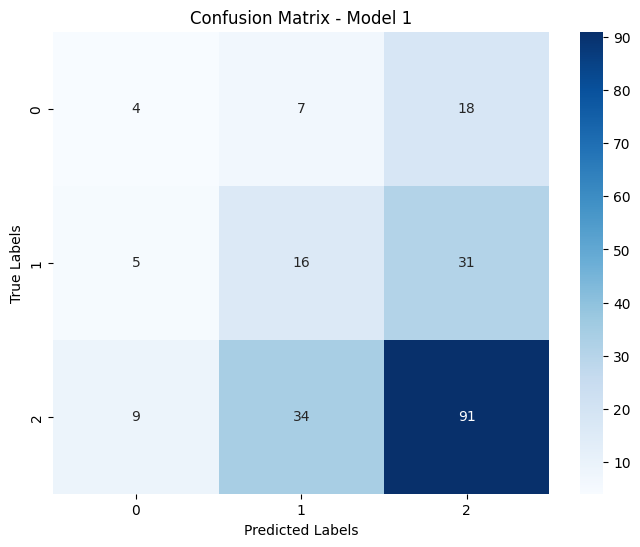

Accuracy: 0.5162790697674419
Precision: 0.5029810961512309
Recall: 0.5162790697674419
F1_score 0.5079512768777232


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Model 1')
plt.show()

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1score = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_score", f1score)

# **5.c) SVD to extract 8 components from the “review/text” column**

In [ ]:
# Apply SVD to extract to extract 8 components from the "review/text" column

tfidf2 = models.TfidfModel(DFM1)
DFM1_tfidf2 = tfidf1[DFM1]


n_SVD = 8
SVD_model2 = models.LsiModel(DFM1_tfidf2, id2word=dictionary1, num_topics=n_SVD)
SVD2 = SVD_model2[DFM1_tfidf2]


# convert results into array
svd_array2 = gensim.matutils.corpus2csc(SVD2).T.toarray()

# convert results to data frame
svd_df2 = pd.DataFrame(svd_array2)

# show SVD results - reduced vector representation of the documents
svd_df2



,0,1,2,3,4,5,6,7
0,0.078684,-0.006421,0.070501,-0.046739,-0.023779,-0.017994,0.116214,-0.089489
1,0.212072,-0.076938,-0.033525,-0.036403,-0.004256,-0.065140,0.015138,-0.009508
2,0.230370,0.193063,0.061027,0.067311,0.023494,0.075225,-0.092490,0.051985
3,0.104634,-0.126462,0.036852,-0.002420,0.092006,0.017705,0.022734,0.009345
4,0.218869,-0.061096,-0.117085,0.023806,0.060356,-0.010978,-0.014999,-0.044394
...,...,...,...,...,...,...,...,...
995,0.252402,0.038446,-0.132282,-0.027829,0.038382,0.065020,0.042760,-0.055930
996,0.140140,0.041711,-0.089283,0.156903,0.002602,-0.015018,-0.034450,0.046486
997,0.146581,0.084486,-0.013991,0.006237,0.083571,-0.120863,-0.016015,0.002315
998,0.113533,-0.014858,0.083256,-0.019146,0.002496,-0.048573,0.118305,-0.080123


In [ ]:
import pandas as pd
import numpy as np

# Combine 5 extracted SVD components with non-text columns('Price' and 'review/helpfulness') for predictive models
model_2 = pd.concat([svd_df2, df[['Price', 'review/helpfulness','review/score']]], axis=1)


In [ ]:
#Dropping null values from review/helpfulness
model_2 = model_2.dropna(subset=['review/helpfulness'])

In [ ]:
bins = [-float('inf'), 2.5, 4.5, float('inf')]

In [ ]:
#Converting review/score into categorical
model_2['review/score_cat'] = pd.cut(model_2['review/score'], bins)

In [ ]:
#Dropping the review/score as review/score_cat is going to be final target variable
model_2.drop(columns=['review/score'], inplace=True)
model_2.head()

,0,1,2,3,4,5,6,7,Price,review/helpfulness,review/score_cat
0,0.078684,-0.006421,0.070501,-0.046739,-0.023779,-0.017994,0.116214,-0.089489,18.96,0.142857,"(4.5, inf]"
1,0.212072,-0.076938,-0.033525,-0.036403,-0.004256,-0.065140,0.015138,-0.009508,14.04,0.950000,"(4.5, inf]"
3,0.104634,-0.126462,0.036852,-0.002420,0.092006,0.017705,0.022734,0.009345,43.94,1.000000,"(2.5, 4.5]"
4,0.218869,-0.061096,-0.117085,0.023806,0.060356,-0.010978,-0.014999,-0.044394,15.27,0.666667,"(2.5, 4.5]"
5,0.408975,-0.054178,0.011324,-0.076218,0.094563,-0.061728,0.043092,0.077454,11.99,1.000000,"(2.5, 4.5]"


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'review/score_cat' column
model_2['review/score_cat'] = label_encoder.fit_transform(model_2['review/score_cat'])

# Display the encoded labels
print(model_2[['review/score_cat']].head())

   review/score_cat
0                 2
1                 2
3                 1
4                 1
5                 1


In [ ]:
import pandas as pd
import numpy as np

# removing review/score_cat as it is a target variable
X_combined2 = model_2[model_2.columns[model_2.columns!= "review/score_cat"]]
print(X_combined2)

            0         1         2         3         4         5         6  \
0    0.078684 -0.006421  0.070501 -0.046739 -0.023779 -0.017994  0.116214   
1    0.212072 -0.076938 -0.033525 -0.036403 -0.004256 -0.065140  0.015138   
3    0.104634 -0.126462  0.036852 -0.002420  0.092006  0.017705  0.022734   
4    0.218869 -0.061096 -0.117085  0.023806  0.060356 -0.010978 -0.014999   
5    0.408975 -0.054178  0.011324 -0.076218  0.094563 -0.061728  0.043092   
..        ...       ...       ...       ...       ...       ...       ...   
993  0.220623 -0.234854  0.082223  0.000485 -0.043705  0.093350  0.052467   
994  0.209978  0.143120 -0.018537 -0.072094 -0.023873  0.078982 -0.066444   
995  0.252402  0.038446 -0.132282 -0.027829  0.038382  0.065020  0.042760   
996  0.140140  0.041711 -0.089283  0.156903  0.002602 -0.015018 -0.034450   
999  0.121663 -0.061327  0.051782 -0.016570  0.020165 -0.011982  0.065452   

            7  Price  review/helpfulness  
0   -0.089489  18.96            

In [ ]:

# Split data into training and testing sets
y_combined = model_2["review/score_cat"]
X_train, X_test, y_train, y_test = train_test_split(X_combined2, y_combined, test_size=0.3, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Convert feature names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Build decision tree model (Model 2)
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train, y_train)


# Predictions
y_pred = model2.predict(X_test)

# Confusion matrix of Model 2
conf_matrix2 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix of Model 2:")
print(conf_matrix2)

Confusion Matrix of Model 2:
[[ 5  9 15]
 [ 8 12 32]
 [11 26 97]]


In [ ]:
# Count True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = np.diag(conf_matrix2)
FP = np.sum(conf_matrix2, axis=0) - TP
FN = np.sum(conf_matrix2, axis=1) - TP
TN = np.sum(conf_matrix2) - (TP + FP + FN)

# Print the counts
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

True Positives (TP): [ 5 12 97]
True Negatives (TN): [167 128  34]
False Positives (FP): [19 35 47]
False Negatives (FN): [24 40 37]


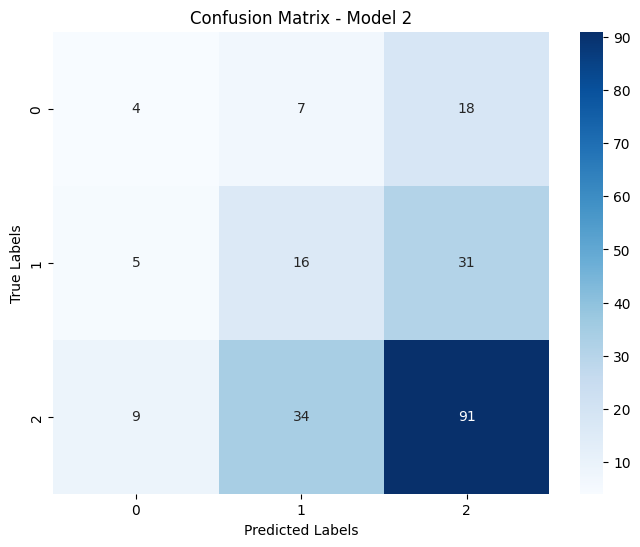

Accuracy: 0.5302325581395348
Precision: 0.5096844246522624
Recall: 0.5302325581395348
F1_score 0.5190165120287191


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Model 2')
plt.show()

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1score = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_score", f1score)

# **So, which model?**

As the number of components extracted from SVD increases, due to its higher-dimensional feature representation it captures more variance in the data and potentially provides a richer representation of  the text features. Therefore, Model-2 should perform better due to its ability to capture more nuanced patterns in the data.
(Model-2), despite having a higher-dimensional feature representation, has lower accuracy compared to
the first model (Model-1), there could be several reasons for this discrepancy. It could be due to
overfitting, noise in additional components, lack of sufficient data, suboptimal hyperparameters, or
randomness in the modeling process. Further investigation and experimentation is needed to determine
the exact cause of the lower performance.